In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the train data into df1 & printing the first five rows of it

df1=pd.read_csv('big-mart-train.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Printing the shape of df1

df1.shape

(8523, 12)

In [4]:
#Getting the description of df1

df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#Getting all the data types of all the columns & printing it

df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#Checking is there any null value present we can see that in Item_weight & Outlet_Size there are missing values

df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# DATA VISUALIZATION

# UNIVARIET ANALYSIS

In [7]:
fe = df1[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]

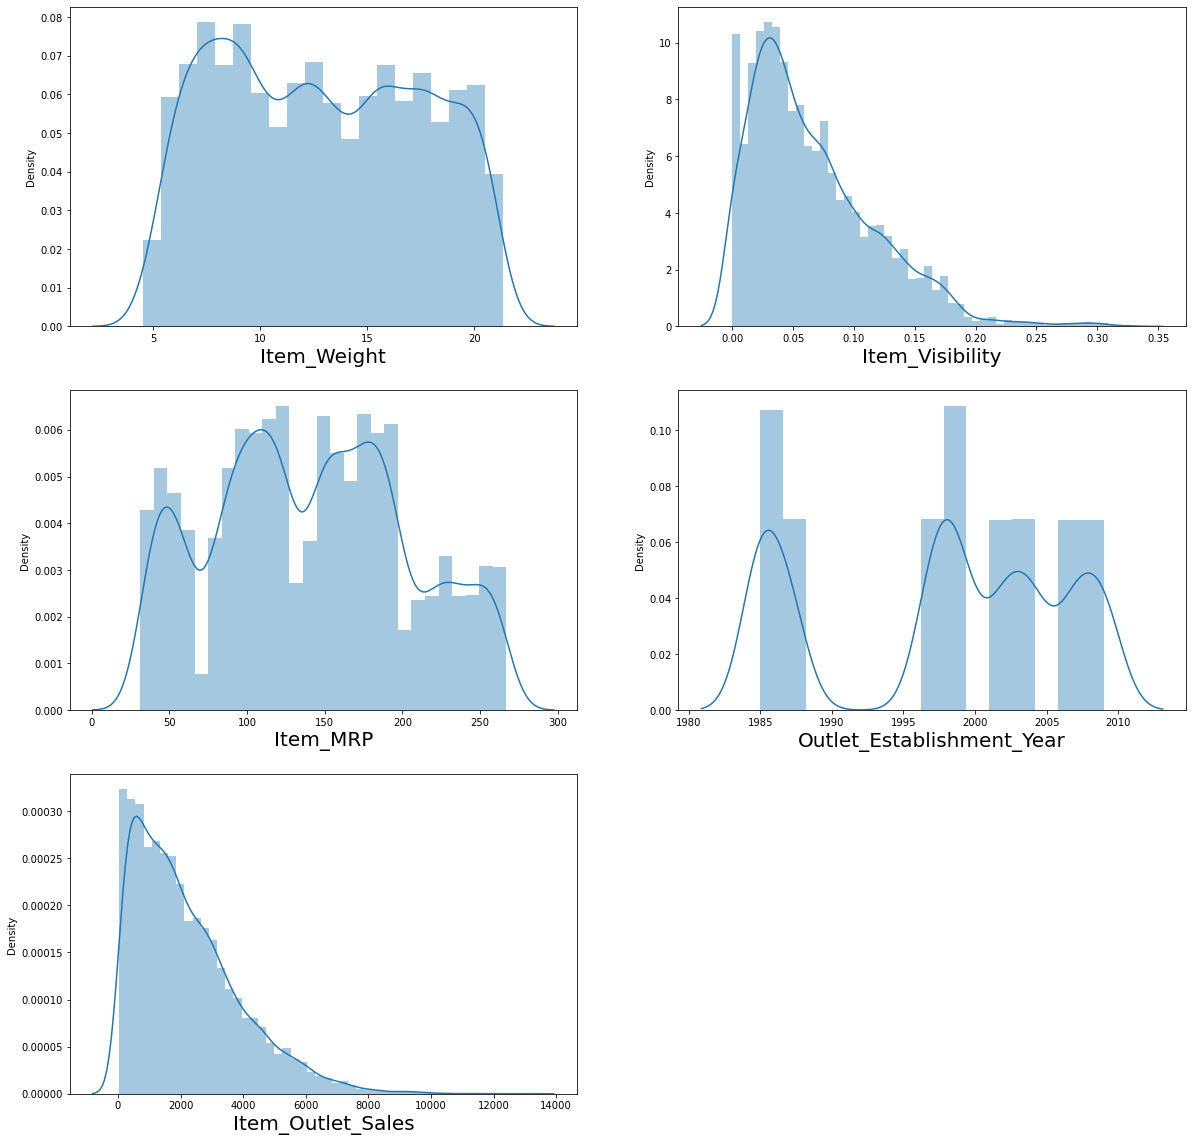

In [8]:
#Relationship Visualizing
#KDE-plot

plt.figure(figsize = (20,20))
plotnumber = 1

for column in fe:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.distplot(fe[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

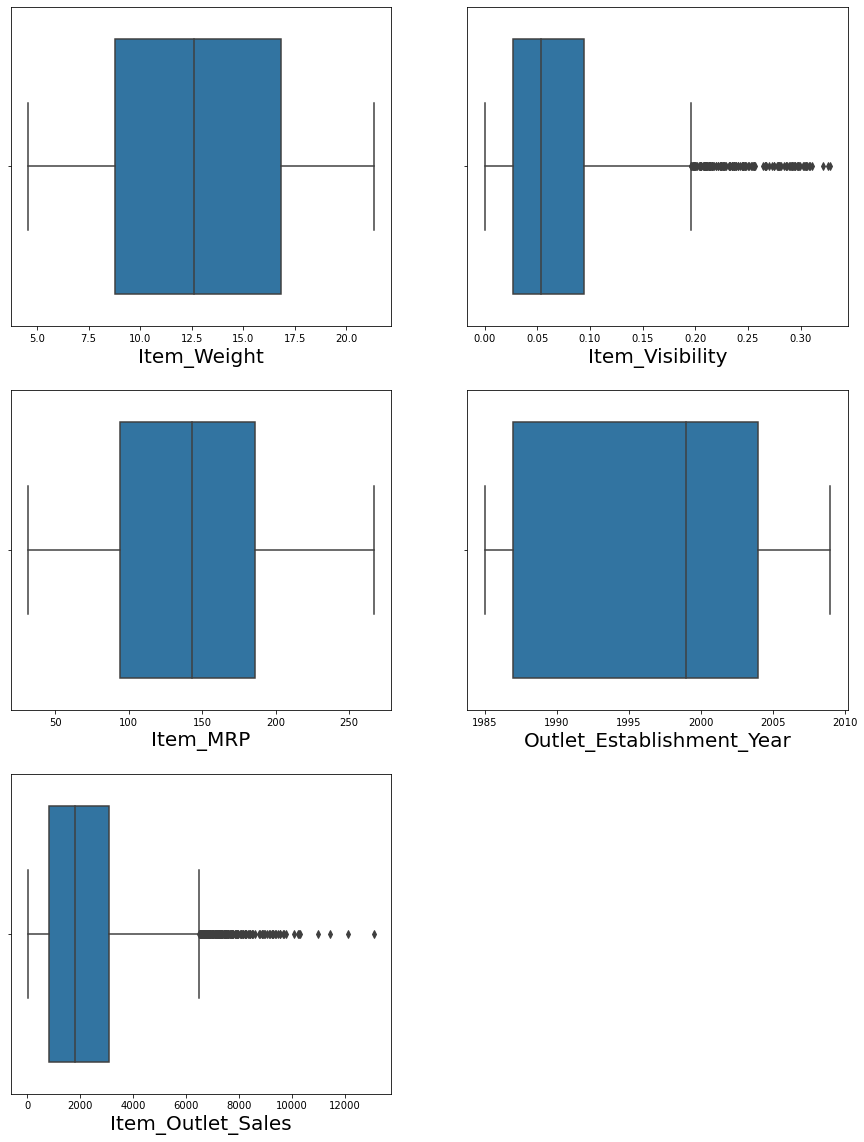

In [9]:
#Relationship visualization
#Boxplot

plt.figure(figsize = (15,20))
plotnumber = 1

for column in fe:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.boxplot(fe[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

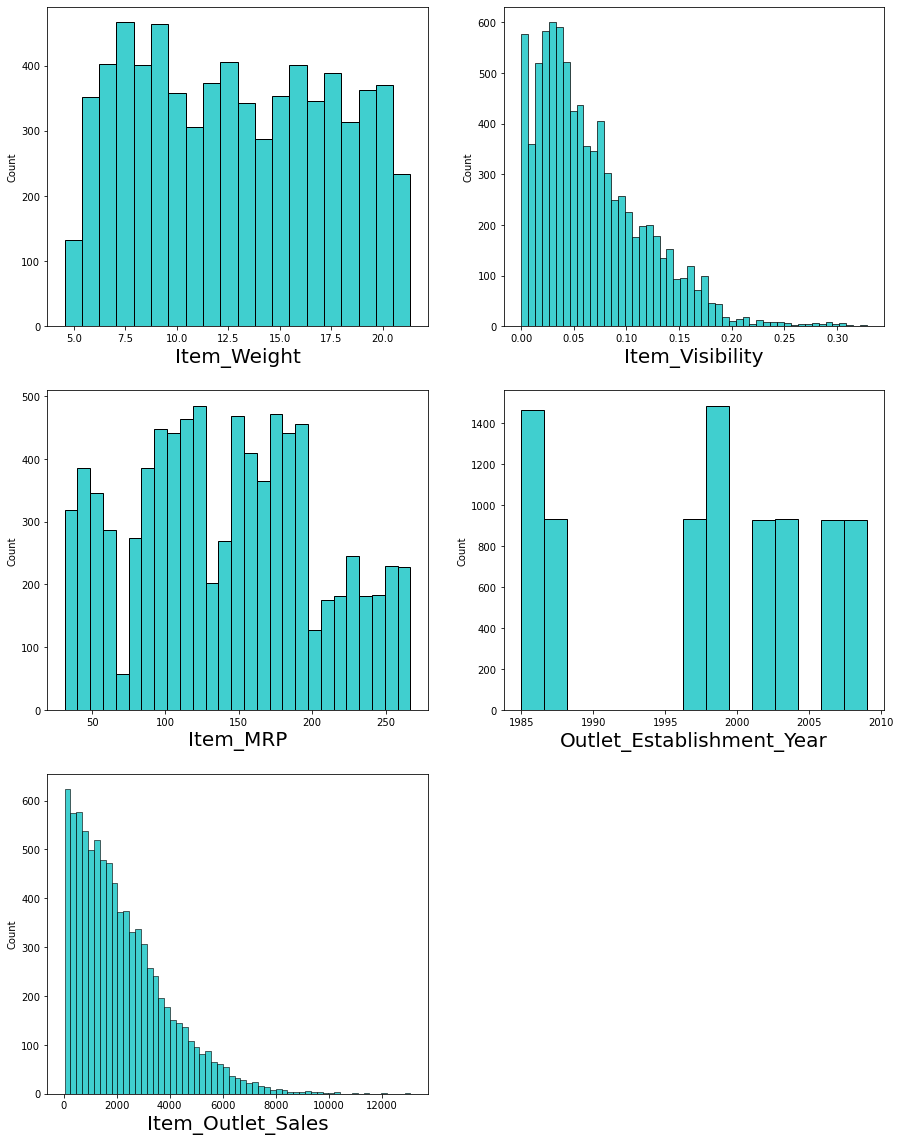

In [10]:
#Relationship visualizing
#Histogram plot

plt.figure(figsize = (15,20))
plotnumber = 1

for column in fe:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.histplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

# BI-VARIET ANALYSIS

In [11]:
#We will drop the target columns as for scatter plot we need to do that

df_bi=df1.drop(['Outlet_Location_Type'], axis=1)
df_bi=df1.drop(['Outlet_Type'], axis=1)
df_bi=df1.drop(['Outlet_Size'], axis=1)

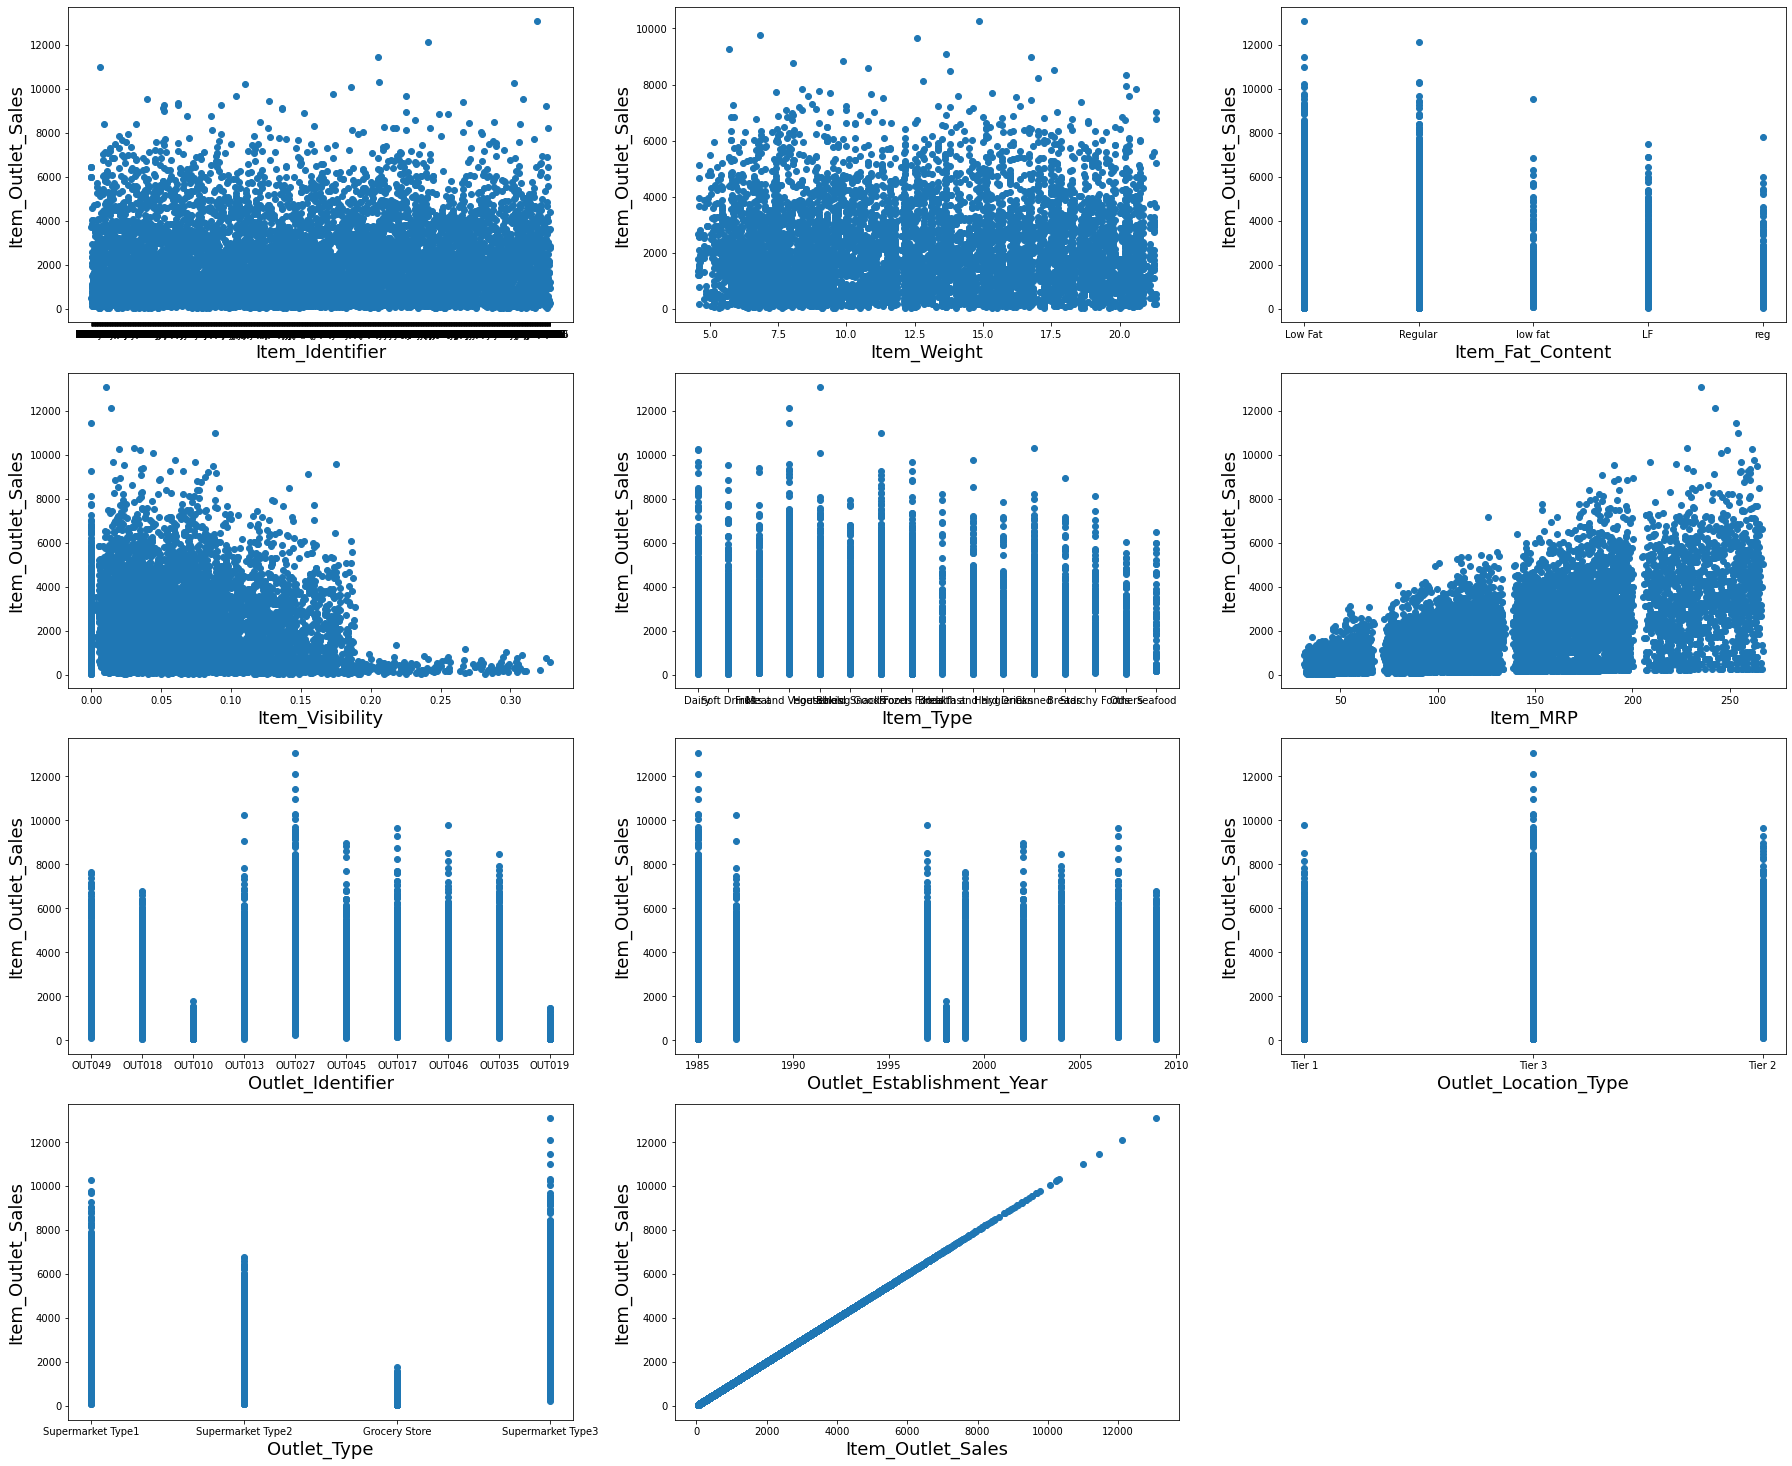

In [12]:
#Relationship Visualizing

plt.figure(figsize = (25,25))
plotnumber = 1

for column in df_bi:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df_bi[column],df_bi['Item_Outlet_Sales'])
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Item_Outlet_Sales', fontsize=18)
    plotnumber += 1
plt.tight_layout()

# MULTIVARIET ANALYSIS

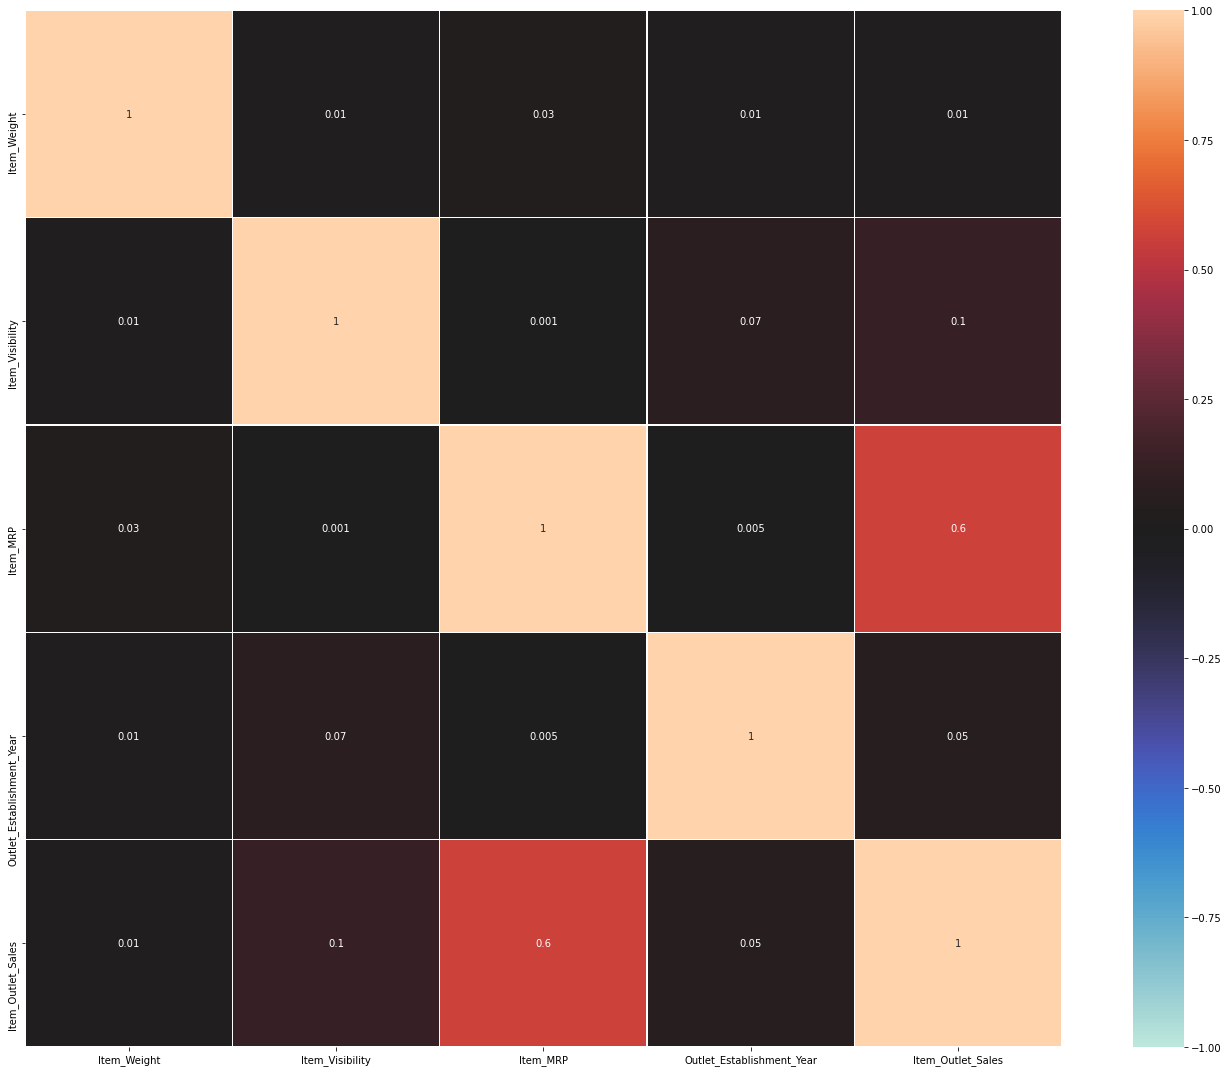

In [13]:
#Plotting corelation
#Here all the light colors are highly corelated

df1_cor = df1.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df1_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

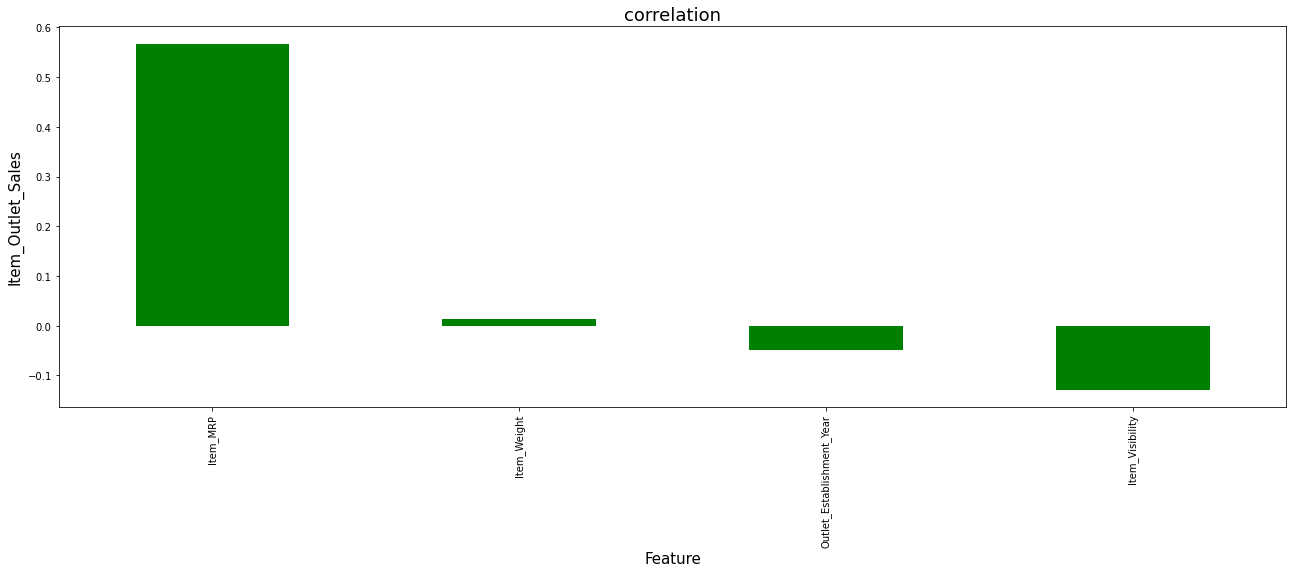

In [14]:
#Showing +ves & -ves corelations 

plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

In [15]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# ENCODING

In [16]:
#Checking unique values present in the Item_Identifier

df1['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [17]:
#Determining how many values present their in Item_Identifier

df1['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCB18     9
FDP25     9
NCI54     9
         ..
FDN52     1
FDQ60     1
FDY43     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [18]:
#Dropping the Item_Identifier colum as we don't need it

df1=df1.drop(['Item_Identifier'], axis=1)

In [19]:
#Encoding the Item_Fat_Content

df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
#Checking different values present

df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
#Replacing all

df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
#Checking value counts

df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
# Replace Item_Fat_Content column to 0 & 1

df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

In [24]:
#Encoding Item_Type column

df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
#Checking value counts

df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
#Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
#Encoding it via LabelEncoder

df1["Item_Type"] = le.fit_transform(df1["Item_Type"])

In [28]:
#Checking unique values present in the Outlet_Indentifier column

df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [29]:
#Checking the value counts

df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [30]:
#Dropping the column as we don't need it

df1=df1.drop(['Outlet_Identifier'], axis=1)

In [31]:
#Checking unique values present in the Outlet_Size column

df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [32]:
#Checking value counts of the column

df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
#Treating the missing values & filling it with mode

df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])

In [34]:
#Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
#Transforming it through LabelEncoder

df1["Outlet_Size"] = le.fit_transform(df1["Outlet_Size"].values.reshape(-1,1))

In [36]:
#Checking how many unique values are there in Outlet_Size

df1['Outlet_Size'].unique()

array([1, 0, 2])

In [37]:
#Checking is there any unique values present un Outler_Location_Type column

df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [38]:
#Checking value counts of this column

df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [39]:
#Encoding it with LabelEncoder

df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])

In [40]:
#Encoded successfully

df1['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [41]:
#Checking how many unique values are present in Outlet_Type column

df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
#Checking for value counts

df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [43]:
#Encoding it with LabelEncoder

df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [44]:
#Encoded successfully

df1['Outlet_Type'].unique()

array([1, 2, 0, 3])

# HANDLING MISSING VALUES

In [45]:
#Filling the Nan values of Item_Weight column with mean of Item_Weight column 

df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [46]:
#Printing the new dataframe

df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


# REMOVING OUTLIERS

In [47]:
#Printing the data types of the dataset

df1.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [48]:
#Importing zscore for removing outliers

from scipy.stats import zscore

z_score= zscore(df1[['Item_Weight','Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df1 = df1[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df1.shape)
print("shape after".ljust(20),":", new_df1.shape)
print("Percentage Loss".ljust(20),":", (df1.shape[0]-new_df1.shape[0])/df1.shape[0])

shape before and after
shape before         : (8523, 10)
shape after          : (8428, 10)
Percentage Loss      : 0.011146309984747155


# % OF DATA LOSS

In [49]:
#1.114 % data is lost

In [50]:
#Printing the description of new dataframe

new_df1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.00000,8428.000000
mean,12.861218,0.648196,0.063905,7.227337,140.996015,1997.911723,1.166469,1.115449,1.21476,2202.021401
std,4.238141,0.477561,0.047302,4.207285,62.287713,8.356697,0.599973,0.810126,0.79060,1704.631341
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.00000,33.290000
25%,9.300000,0.000000,0.026861,4.000000,93.802150,1987.000000,1.000000,0.000000,1.00000,862.876800
50%,12.857645,1.000000,0.053293,6.000000,142.915400,1999.000000,1.000000,1.000000,1.00000,1816.968200
75%,16.100000,1.000000,0.093160,10.000000,185.708200,2004.000000,2.000000,2.000000,1.00000,3115.944000
max,21.350000,1.000000,0.220226,15.000000,266.888400,2009.000000,2.000000,2.000000,3.00000,13086.964800


In [51]:
#Features in which outliers are detected

data2 = df1
fe = data2[['Item_Weight','Item_Visibility','Item_MRP']]

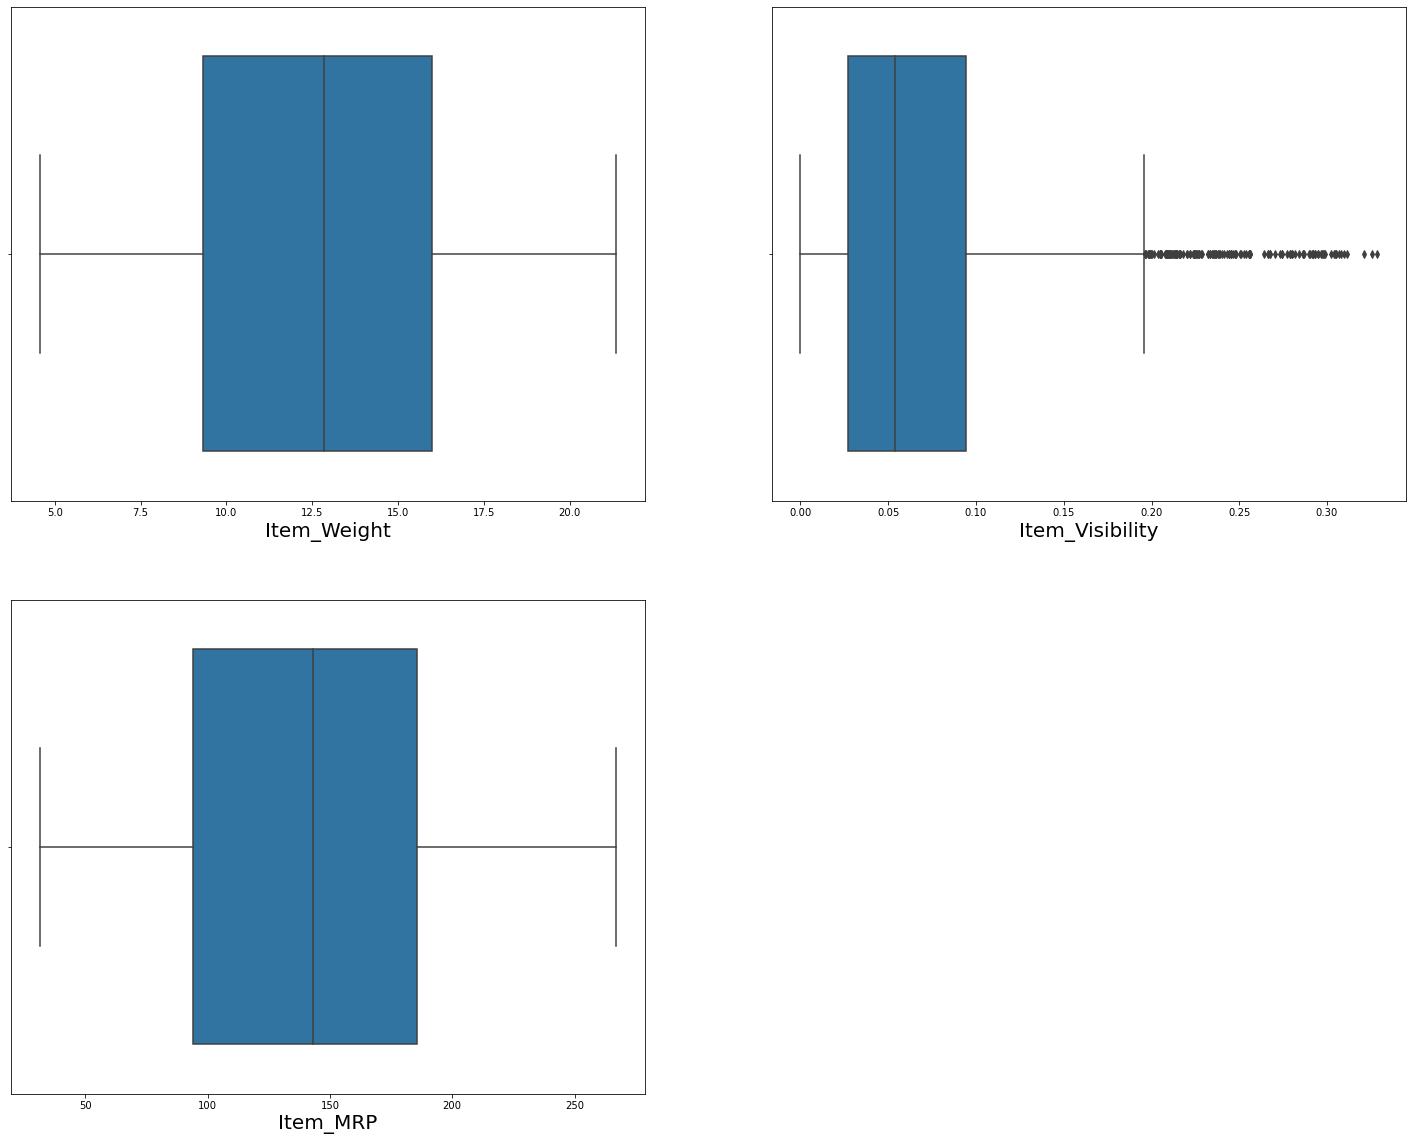

In [52]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(2,2, graph)
        sn.boxplot(fe[column])
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [53]:
#Finding the IQR (Inter Quantile Range) to identify outliers

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1
iqr

Item_Weight                     6.690000
Item_Fat_Content                1.000000
Item_Visibility                 0.067596
Item_Type                       6.000000
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Outlet_Size                     1.000000
Outlet_Location_Type            2.000000
Outlet_Type                     0.000000
Item_Outlet_Sales            2267.049000
dtype: float64

In [54]:
#Printing the description

data2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.647307,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [55]:
#As shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visi_out = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visi_out

0.195979015

In [56]:
#After removing outliers 8839 rows will remain in the dataframe

index_out = np.where(data2['Item_Visibility'] > visi_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8375,8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8376,8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8377,8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [57]:
#1.68 % of data is lost after removing outlier 

((8523-8379)/8523)*100

1.689545934530095

# TEST DATASET

In [58]:
#Importing the dataset into df2 & printing its first five rows

df2=pd.read_csv('big-mart-test.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
#Printing the shape of testing file

df2.shape

(5681, 11)

In [60]:
#Getting the description of the testing file

df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [61]:
#Printing the data types of the testing file

df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [62]:
#Checking is there any null value present there are null values present in the Item_Weight & Outlet_Size

df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# DATA VISUALIZATION

# UNIVARIET ANALYSIS

In [63]:
#Differentiating the features of which we will do univariet analysis

feature = df2[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]]

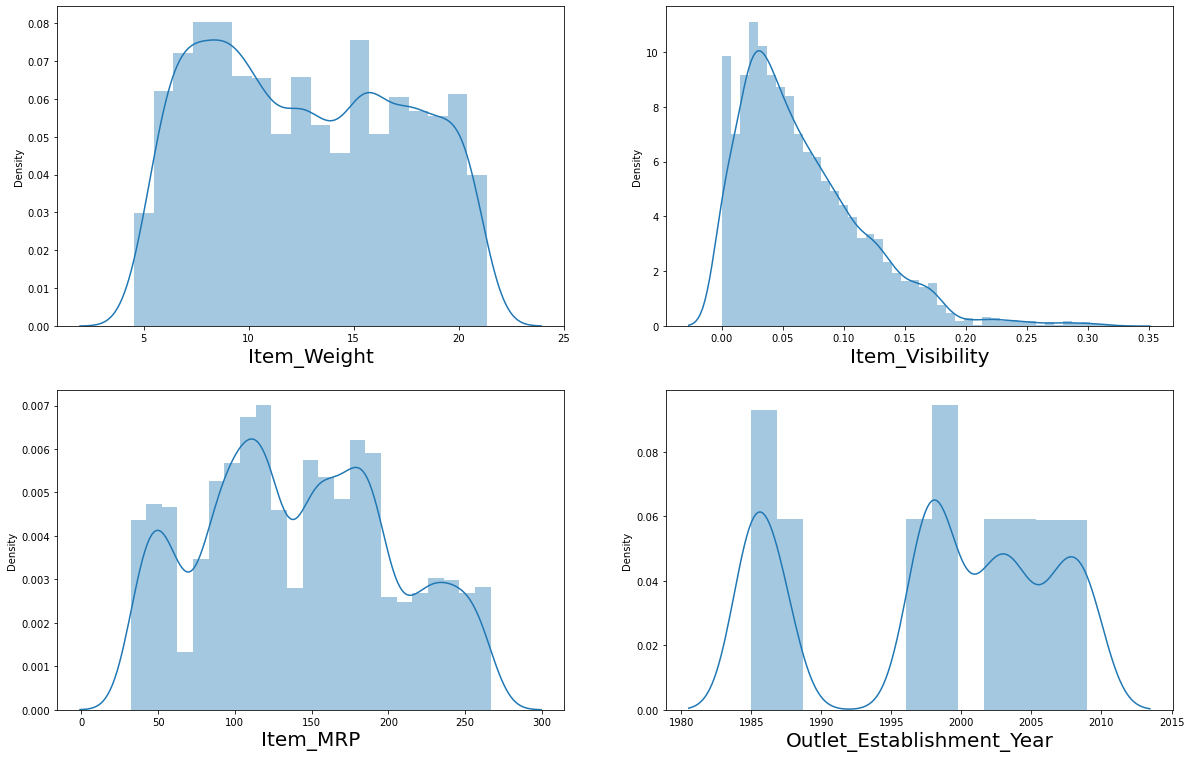

In [64]:
#Relationship visualizing
#Plotting KDE plot

plt.figure(figsize = (20,20))
plotnumber = 1

for column in feature:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.distplot(feature[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

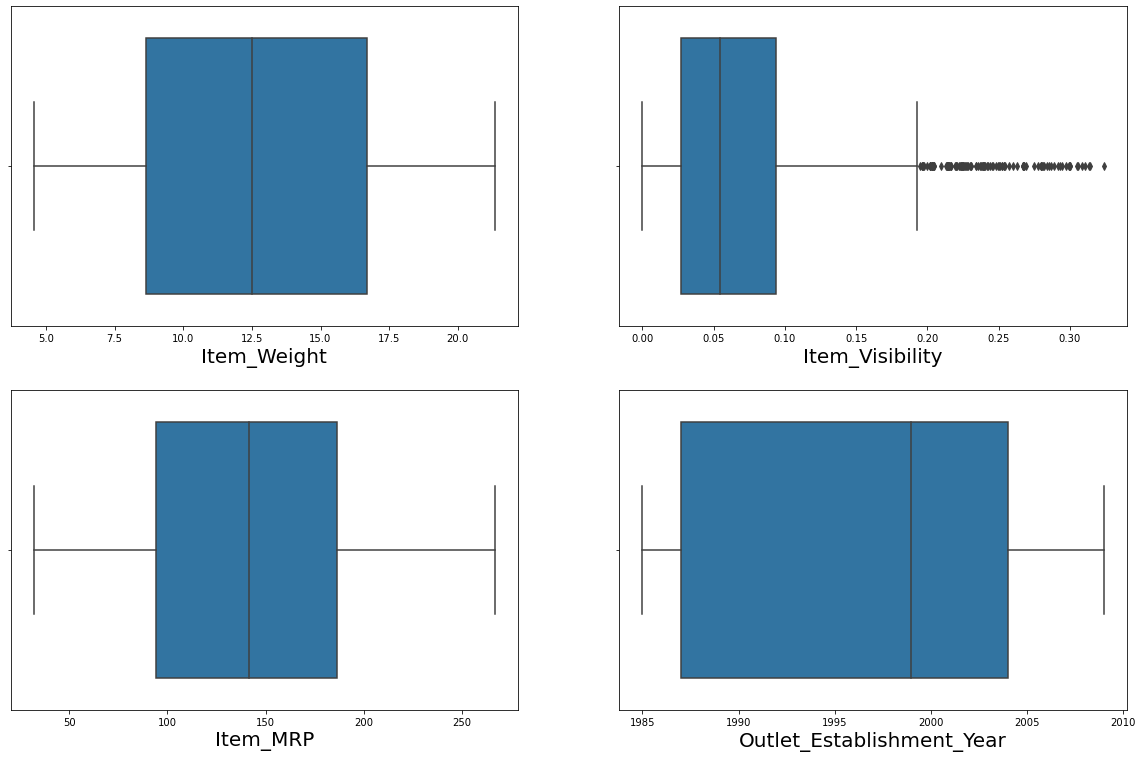

In [65]:
#Relationship visualizing
#Plotting boxplot

plt.figure(figsize = (20,20))
plotnumber = 1

for column in feature:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.boxplot(feature[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

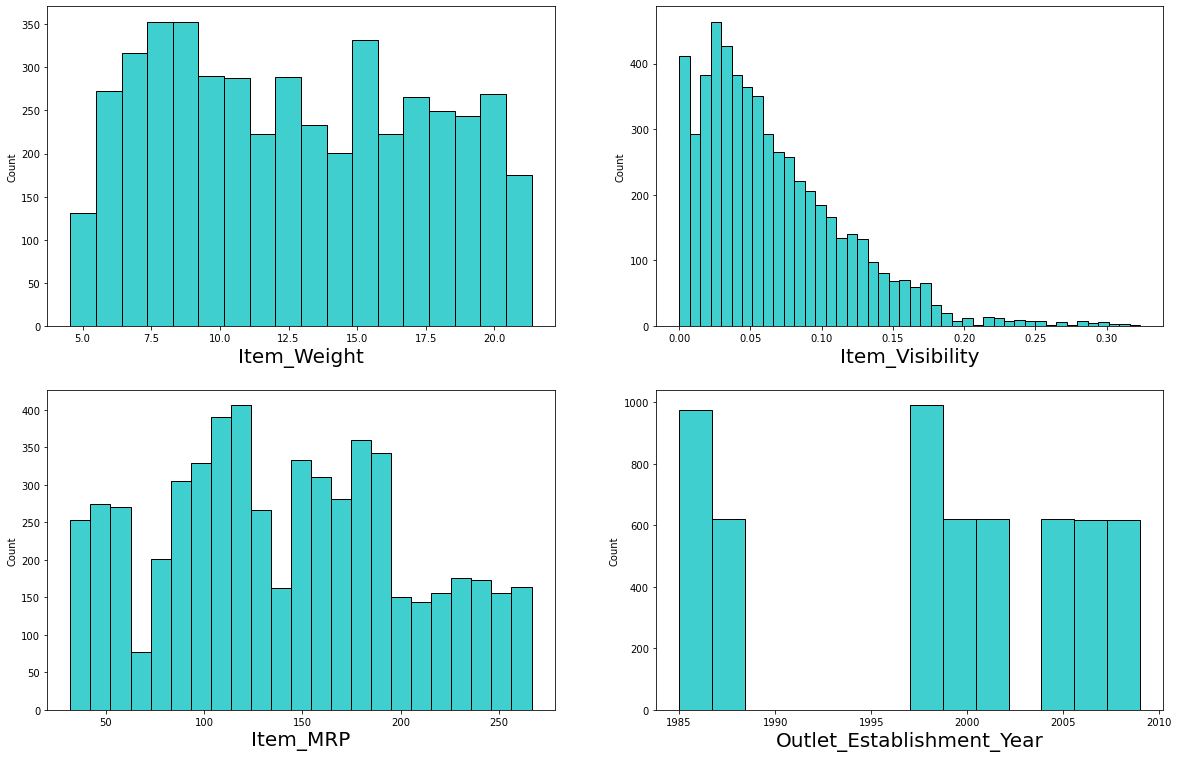

In [66]:
#Relationship visualizing
#Plotting histogram

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.histplot(feature[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

# MULTIVARIET ANALYSIS

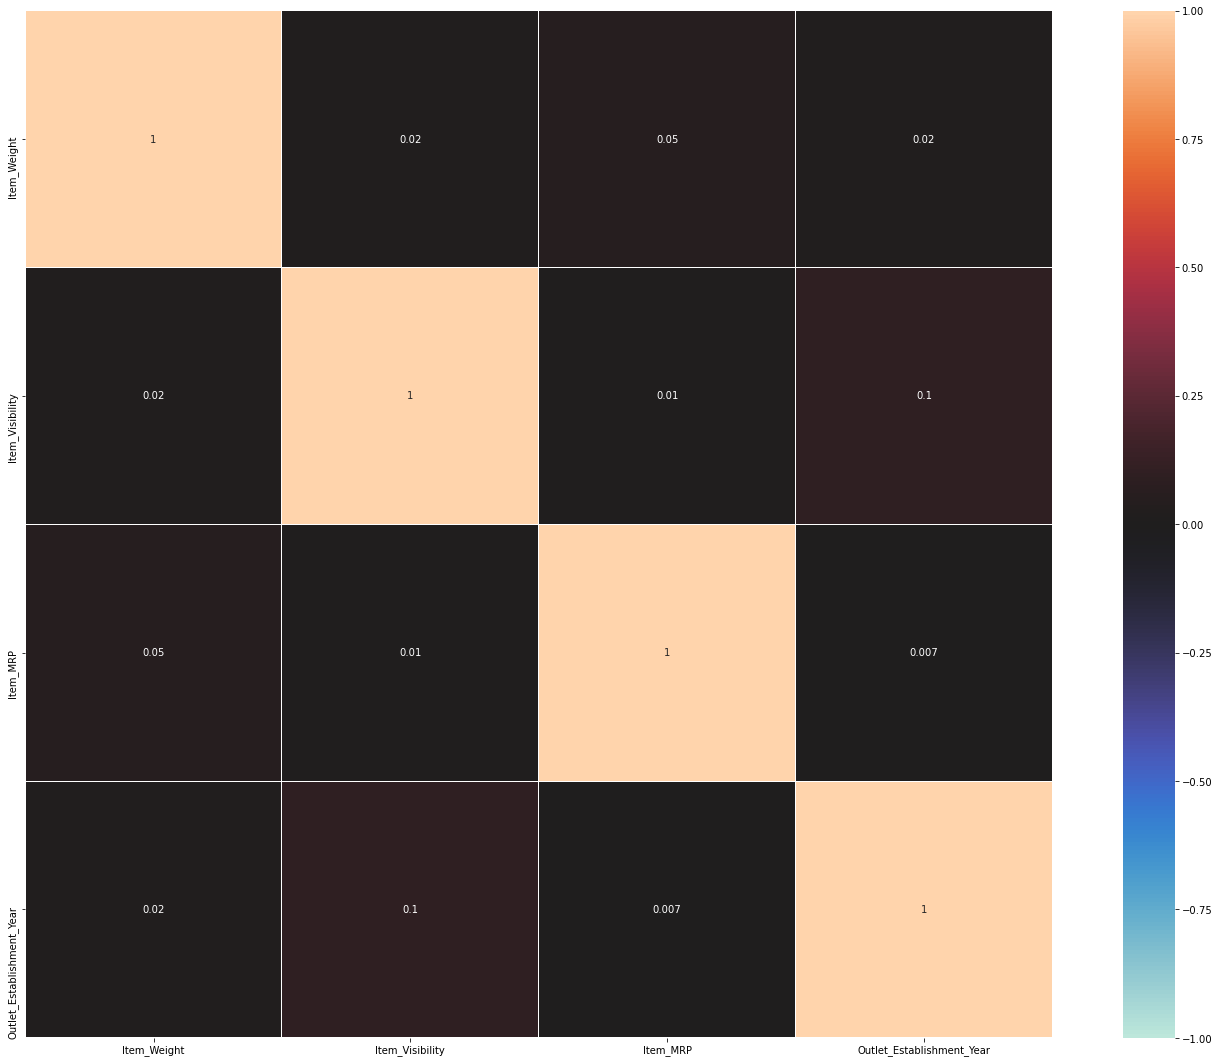

In [67]:
#All the lighter shades are highly corelated

df2_cor = df2.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df2_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

In [68]:
#Printing the first five rows of the testing dataset

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
#Finding the unique values present in the particular column

df2['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [70]:
#Counting different values present

df2['Item_Identifier'].value_counts()

FDP15    8
FDQ60    8
FDZ50    8
FDN52    8
DRF48    8
        ..
NCS53    1
FDJ09    1
NCB31    1
FDY57    1
FDH58    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [71]:
#Droping Item_Identifier column as we don't need it

df2=df2.drop(['Item_Identifier'], axis=1)

In [72]:
#Printing unique values present in the column

df2['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [73]:
#Printing different values are present in the particular column

df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [74]:
#Replacing

df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [75]:
#Counting different values to be present in thr particular column

df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [76]:
#Replacing Item_Fat_Content column to binary encoder

df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

In [77]:
#Printing unique values present in the particular dataset

df2['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [78]:
#Printing different values present in the dataset

df2['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [79]:
#Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
#Transforming the column

df2["Item_Type"] = le.fit_transform(df2["Item_Type"])

In [81]:
#Checking the different values present in the column

df2['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [82]:
#Showing different value counts present in the column

df2['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT035    620
OUT049    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [83]:
#Droping Outlet_Type colum as its just an identifier & we don't need it

df2=df2.drop(['Outlet_Identifier'], axis=1)

In [84]:
#Printing the unique values present in the particular column

df2['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [85]:
#Printing different value counts that are present into the column

df2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [86]:
#Transforming it with the mode of that column

df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [87]:
#Transforming the column

df2["Outlet_Size"] = le.fit_transform(df2["Outlet_Size"].values.reshape(-1,1))

In [88]:
#Checking unique values that are present in the column

df2['Outlet_Size'].unique()

array([1, 2, 0])

In [89]:
#Printing the unique values that are present in the column

df2['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [90]:
#Printing the different value counts are to be present in the column

df2['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [91]:
#Transforming the column

df2["Outlet_Location_Type"] = le.fit_transform(df2["Outlet_Location_Type"])

In [92]:
#Checking unique values that are present in the column

df2['Outlet_Location_Type'].unique()

array([0, 1, 2])

In [93]:
#Printing the unique values that are present in the column

df2['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [94]:
#Printing the different value counts are to be present in the column

df2['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [95]:
#Transforming the column

df2["Outlet_Type"] = le.fit_transform(df2["Outlet_Type"])

In [96]:
#Checking unique values that are present in the column

df2['Outlet_Type'].unique()

array([1, 0, 3, 2])

# HANDLING MISSING VALUES

In [97]:
#Filling the Nan values with the mean of the column

df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [98]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,0,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,0,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,0,0.000000,3,214.6218,2007,1,1,1


# REMOVING OUTLIERS

In [99]:
#Printing the datatypes of all the columns

df2.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

In [100]:
#Importing zscore for removing outliers

from scipy.stats import zscore

z_score= zscore(df2[['Item_Weight','Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df2 = df2[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df2.shape)
print("shape after".ljust(20),":", new_df2.shape)
print("Percentage Loss".ljust(20),":", (df2.shape[0]-new_df2.shape[0])/df2.shape[0])

shape before and after
shape before         : (5681, 9)
shape after          : (5600, 9)
Percentage Loss      : 0.01425805315965499


1.42 % of data is lost

In [101]:
#Getting the description of the new dataframe

new_df2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,12.701017,0.647143,0.062899,7.240714,141.126934,1997.926250,1.165714,1.115357,1.218750
std,4.261717,0.477901,0.045919,4.223010,61.771211,8.356738,0.600086,0.809556,0.789174
min,4.555000,0.000000,0.000000,0.000000,31.990000,1985.000000,0.000000,0.000000,0.000000
25%,9.195000,0.000000,0.026848,4.000000,94.446200,1987.000000,1.000000,0.000000,1.000000
50%,12.695633,1.000000,0.053348,6.000000,141.531200,1999.000000,1.000000,1.000000,1.000000
75%,15.850000,1.000000,0.091380,10.000000,186.098350,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.216763,15.000000,266.588400,2009.000000,2.000000,2.000000,3.000000


In [102]:
#Features in which are contineous in nature

data1 = df2
fet = data1[['Item_Weight','Item_Visibility','Item_MRP']]

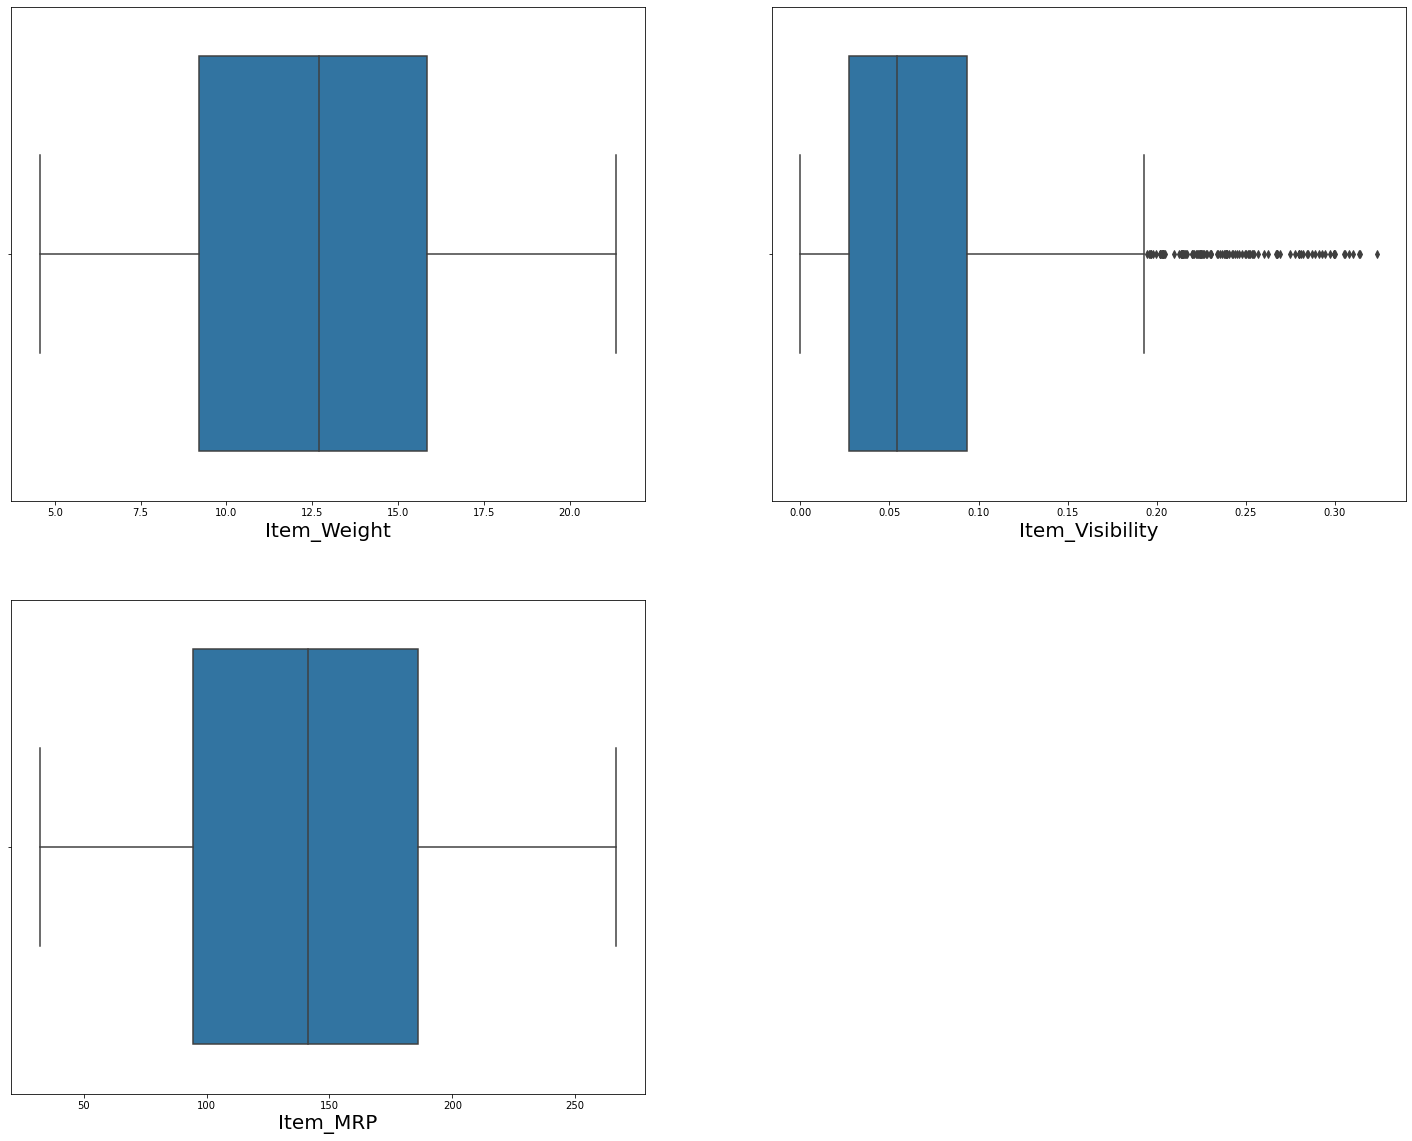

In [103]:
plt.figure(figsize=(25,20))
graph = 1

for column in fet:
    if graph <= 30:
        ax = plt.subplot(2,2, graph)
        sn.boxplot(fet[column])
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [104]:
#find the IQR (Inter Quantile Range) to identify outliers

#1st quantile 25%
q1 = data1.quantile(0.25)

#3rd quantile 75%
q3 = data1.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [105]:
#Getting the description of the dataframe 

data1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.645661,0.065684,7.233410,141.023273,1997.828903,1.170921,1.112832,1.201373
std,4.245189,0.478355,0.051252,4.219057,61.809091,8.372256,0.600328,0.812824,0.796740
min,4.555000,0.000000,0.000000,0.000000,31.990000,1985.000000,0.000000,0.000000,0.000000
25%,9.195000,0.000000,0.027047,4.000000,94.412000,1987.000000,1.000000,0.000000,1.000000
50%,12.695633,1.000000,0.054154,6.000000,141.415400,1999.000000,1.000000,1.000000,1.000000
75%,15.850000,1.000000,0.093463,10.000000,186.026600,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.323637,15.000000,266.588400,2009.000000,2.000000,2.000000,3.000000


In [106]:
#As shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visible_out = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visible_out

0.193086245

In [107]:
index_out = np.where(data1['Item_Visibility'] > visible_out)
data1 = data1.drop(data1.index[index_out])
data1.shape
data1.reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,1,8.300000,0,0.038428,4,87.3198,2007,1,1,1
2,2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,4,12.695633,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5563,5676,10.500000,0,0.013496,13,141.3154,1997,2,0,1
5564,5677,7.600000,0,0.142991,15,169.1448,2009,1,2,2
5565,5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5566,5679,15.300000,0,0.000000,3,214.6218,2007,1,1,1


In [108]:
((5681-5568)/5681)*100

1.9890864284456962

1.98 % of data is lost after using IQR method 

# TRAINING & TESTING PHASE

In [109]:
#Dividing the phases

x = new_df1.drop(columns = 'Item_Outlet_Sales', axis=1)
y = new_df1['Item_Outlet_Sales']
x1 = new_df2

# SCALLING

In [110]:
#Scalling the x

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [111]:
x1_scalar = ss.fit_transform(x1)

# VARIANCE INFLATION FACTOR

In [112]:
#Importing needed libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.001837,Item_Weight
1,1.022635,Item_Fat_Content
2,1.029653,Item_Visibility
3,1.022841,Item_Type
4,1.001759,Item_MRP
5,1.070997,Outlet_Establishment_Year
6,1.701470,Outlet_Size
7,2.039600,Outlet_Location_Type
8,1.363052,Outlet_Type


In [113]:
#Checking another one

vif2 = pd.DataFrame()
vif2["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif2["Features"] = x1.columns
vif2

,vif,Features
0,1.004589,Item_Weight
1,1.029150,Item_Fat_Content
2,1.023601,Item_Visibility
3,1.031752,Item_Type
4,1.005894,Item_MRP
5,1.076182,Outlet_Establishment_Year
6,1.702692,Outlet_Size
7,2.050047,Outlet_Location_Type
8,1.361703,Outlet_Type



# MODELS

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.255994953147085 on Random_state  152


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 152)

# LINEAR REGRESSION

In [116]:
#Importing LinearRegression

from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [117]:
#Predicting

pred_test=Lr.predict(x_test)

In [118]:
#Printing r2score

print(r2_score(y_test,pred_test))

0.5080563013514392


# CROSS VALIDATION

In [119]:
#Cross validation score for Linear regression is : 50.31%
#The Accuracy score for Linear regression model is : 50.80%

from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.503093194693643

# REGULARIZATION

In [120]:
#Importing Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [121]:
#Making fit

ls = Lasso(alpha = 10, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.5083508321080572

# RANDOM FOREST REGRESSION

In [122]:
#Importing Regressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [123]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  58.277591765737725
Cross Val Score:  56.734968402255745


# SAVING THE MODEL

In [124]:
import joblib
joblib.dump(mod,"BigDataMart.pkl")

['BigDataMart.pkl']

In [125]:
bd_model = joblib.load('BigDataMart.pkl')

# CONCLUSION

In [126]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Rfr.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,2769.7280,3675.069524
1,3530.0716,2112.962906
2,2150.5340,1878.101956
3,932.1200,588.071179
4,1054.6272,1206.516154
...,...,...
1681,2649.8840,2138.406453
1682,3139.9128,3449.922596
1683,992.0420,505.282278
1684,1640.5312,1662.735630
